# EDA on Retail Sales Data

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [80]:
# Display the first few rows of the dataset
print(df.head(5))

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [79]:
df.tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


# Data Overview

In [2]:
# Display basic information about the dataset
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [3]:
# Display summary statistics
print(df.describe())


       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


## Data Cleaning

In [4]:
# Check for missing values
print(df.isnull().sum())


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [5]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")


Duplicate rows: 0


In [6]:
df.shape



(1000, 9)

# Data Visualization

In [7]:
# Customer Gender Distribution
gender_dist = df['Gender'].value_counts()
print(gender_dist)

Gender
Female    510
Male      490
Name: count, dtype: int64


In [8]:
# Age Distribution
age_dist = df['Age'].describe()


In [9]:
# Total Amount Spent by Gender
gender_total_amount = df.groupby('Gender')['Total Amount'].sum()

Text(0.5, 1.0, 'Customer Gender Distribution')

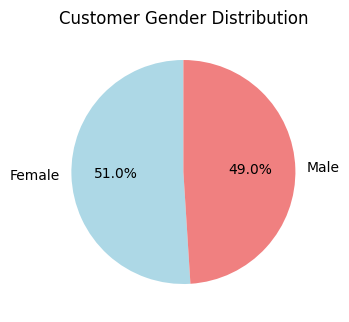

In [10]:
# Pie chart for gender distribution
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Customer Gender Distribution')

Text(0.5, 0, 'Gender')

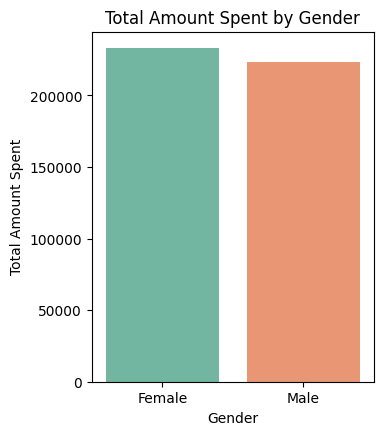

In [11]:
# Bar chart for total amount spent by gender
plt.figure(figsize=(8, 10))
plt.subplot(2, 2,2 )
sns.barplot(x=gender_total_amount.index, y=gender_total_amount.values, palette='Set2')
plt.title('Total Amount Spent by Gender')
plt.ylabel('Total Amount Spent')
plt.xlabel('Gender')


,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


In [72]:
# Calculate average purchase value
average_purchase_value = df['Total Amount'].mean()
print(f'Average Purchase Value: {average_purchase_value:.2f}')

Average Purchase Value: 456.00


In [13]:
# Creating age groups using if-else conditions
def age_group(age):
    if age < 26:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 55:
        return '46-55'
    else:
        return '56-65'

# Applying the age_group function to create a new column 'Age Group'
df['Age Group'] = df['Age'].apply(age_group)


In [14]:
# Counting the number of purchases by each age group
age_group_count = df['Age Group'].value_counts()

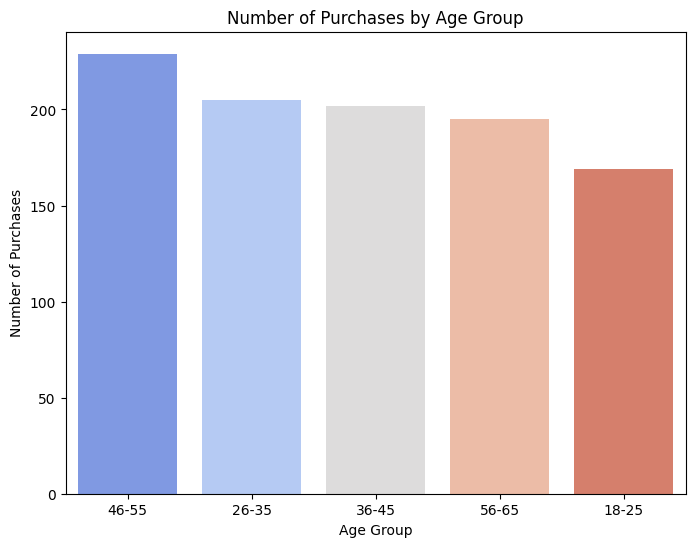

,count
Age Group,
46-55,229
26-35,205
36-45,202
56-65,195
18-25,169


In [15]:
# Plotting the results
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_count.index, y=age_group_count.values, palette='coolwarm')
plt.title('Number of Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.show()

age_group_count

# Product Category Analysis

In [24]:
# Check how many products have been sold under each category.

df.groupby(['Product Category']).agg({'Quantity':np.sum}).reset_index()

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


In [17]:
# Total sales by product category
product_sales = df.groupby('Product Category')['Quantity'].sum()

In [18]:
# Total revenue by product category
product_revenue = df.groupby('Product Category')['Total Amount'].sum()

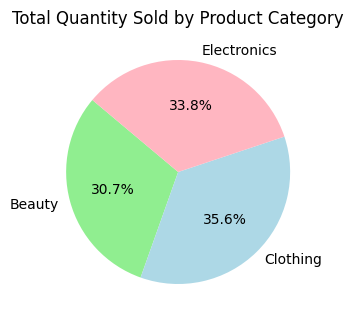

In [19]:
# Pie chart for total quantity sold by category
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.pie(product_sales, labels=product_sales.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightblue', 'lightpink'])
plt.title('Total Quantity Sold by Product Category')

plt.show()


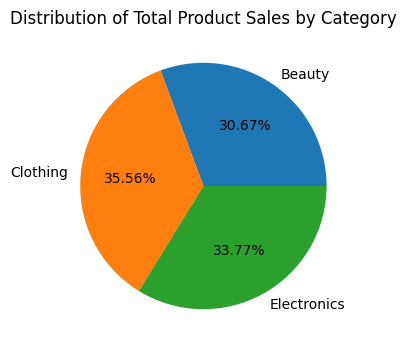

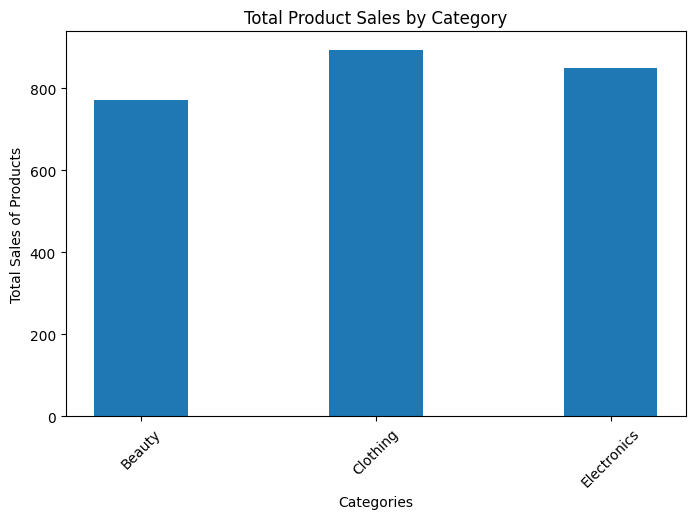

In [41]:

# Group by Product Category and aggregate the total quantity sold
df = df.groupby(['Product Category']).agg({'Quantity': np.sum}).reset_index()

# Pie chart for the distribution of total product sales by category
fig1 = plt.figure(figsize=(6, 4))
plt.pie(df['Quantity'], labels=df['Product Category'], autopct='%1.2f%%')
plt.title('Distribution of Total Product Sales by Category')
plt.show()

# Bar plot for total sales of products by category
fig2 = plt.figure(figsize=(8, 5))
plt.bar(df['Product Category'], df['Quantity'], width=0.4)
plt.xlabel("Categories")
plt.ylabel("Total Sales of Products")
plt.title('Total Product Sales by Category')
plt.xticks(rotation=45)
plt.show()




In [63]:
# Total sales over time
sales_over_time = df.groupby('Date')['Total Amount'].sum().reset_index()

# Interactive sales over time
fig = px.line(sales_over_time, x='Date', y='Total Amount', title='Total Sales Over Time (Interactive)')
fig.show()

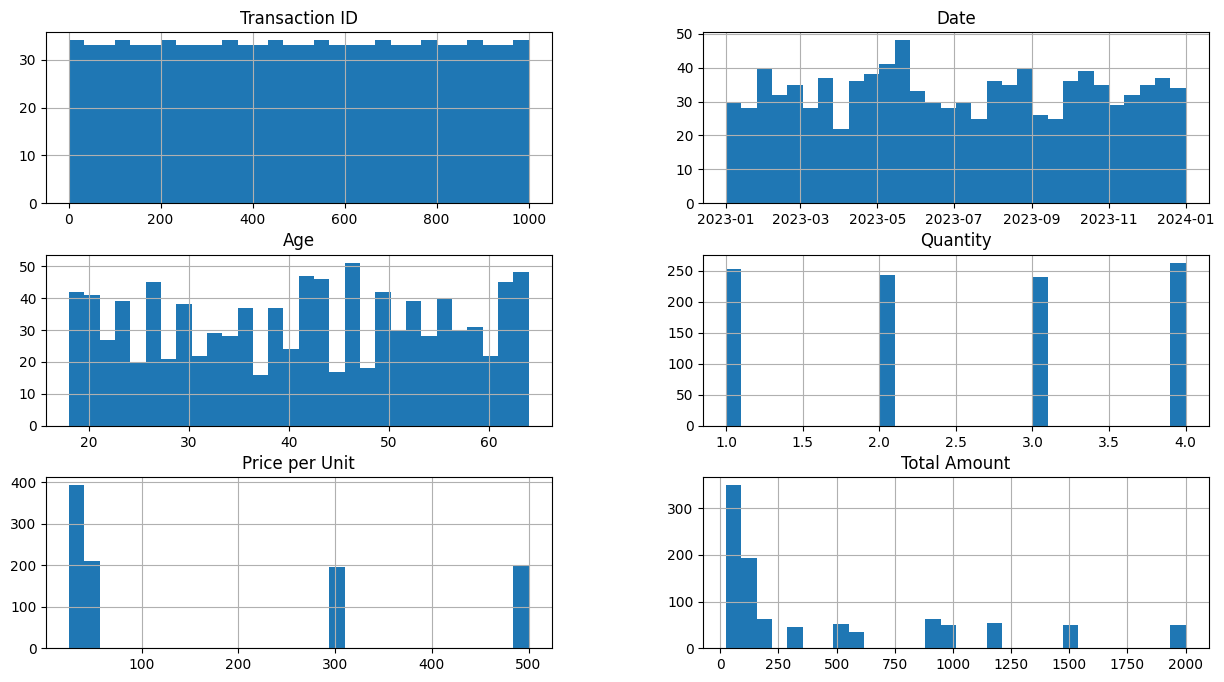

In [59]:
# Plot the histograms of each
df.hist(bins=30, figsize=(15,8))
plt.show()

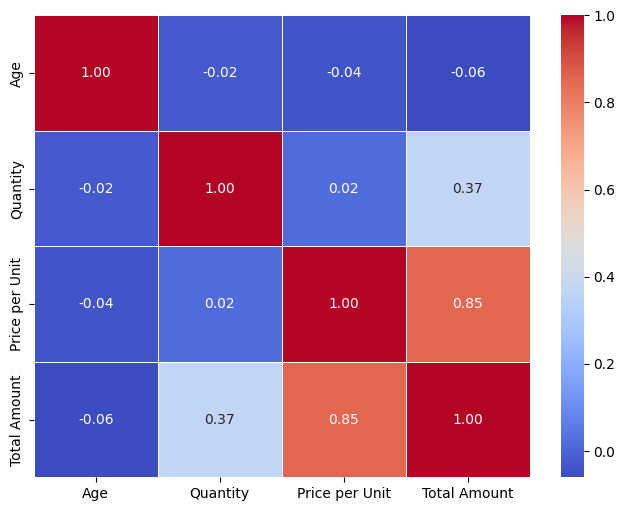

In [60]:

# Draw the heatmap with the correlation matrix
corr_matrix = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.show()
